例えば、2値化した画像をRGBに変換した際に、JPGフォーマットだと圧縮処理が入るため、0,255以外の画素値が含まれている。  
それを確認するためのコード

In [24]:
import cv2
import os
from IPython.display import display, Image


img = cv2.imread("../../sample_data/sample_jpg.jpg")
img = cv2.imread("../../sample_data/sample_person.jpg")

## 通常の場合
print("通常の場合")
print(list(set([n for n in img.reshape(-1)])))


## グレイスケールの場合
print("グレイスケールの場合")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(list(set([n for n in gray.reshape(-1)])))

## 2値化画像の場合
print("2値化画像の場合")
ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
print(list(set([n for n in binary.reshape(-1)])))


通常の場合
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

jpgで保存した場合
[0, 1, 2, 3, 4, 5, 6, 7, 8, 246, 248, 249, 250, 251, 252, 253, 254, 255]


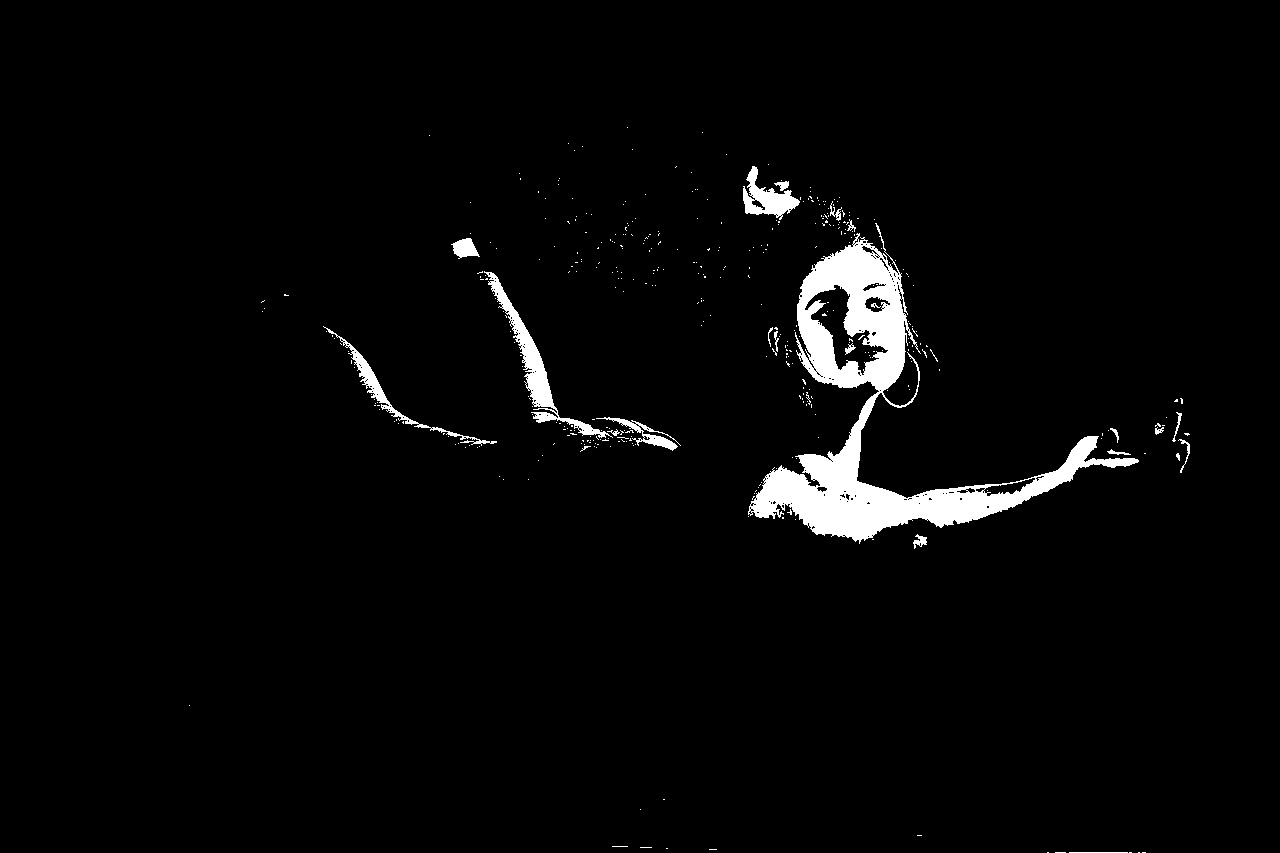

pngで保存した場合
[0, 255]


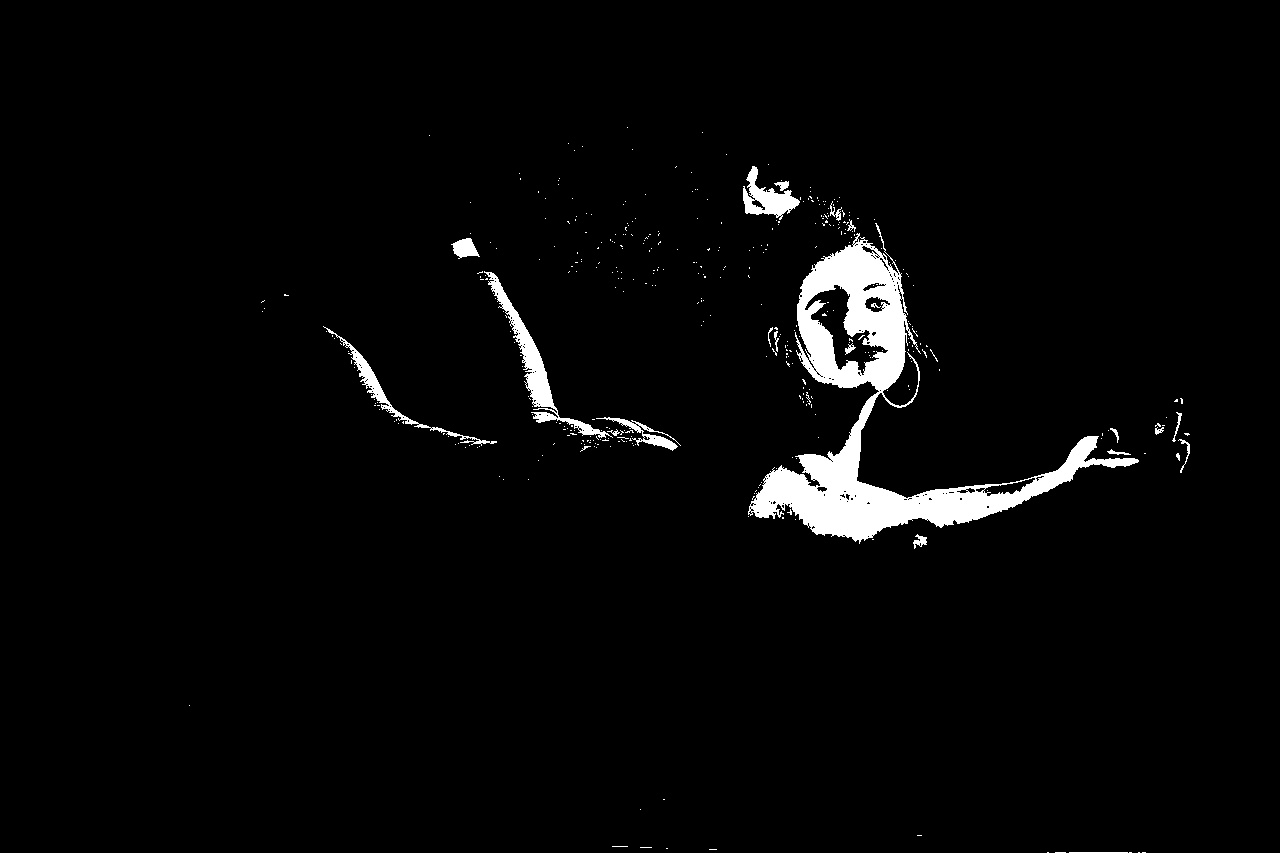

In [25]:
# jpgで保存した場合
print("jpgで保存した場合")
cv2.imwrite("tmp.jpg", binary)
jpg_img = cv2.imread("tmp.jpg")
print(list(set([n for n in jpg_img.reshape(-1)])))
_, buf = cv2.imencode(".jpg", jpg_img)
display(Image(data=buf.tobytes(), width=300))


# pngで保存した場合
print("pngで保存した場合")
cv2.imwrite("tmp.png", binary)
png_img = cv2.imread("tmp.png")
print(list(set([n for n in png_img.reshape(-1)])))
_, buf = cv2.imencode(".jpg", png_img)
display(Image(data=buf.tobytes(), width=300))

# 作成した画像ファイルを削除
os.remove("tmp.jpg")
os.remove("tmp.png")
